<h1 style='color: green; font-size: 36px; font-weight: bold;'>Análise de data - Pressão Arterial</h1>

## Importando bibliotecas


In [1]:
!pip3 install scipy==1.7 --upgrade

     |████████████████████████████████| 28.5 MB 27 kB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [2]:
!pip3 install statsmodels==0.12.2 --upgrade 

     |████████████████████████████████| 9.5 MB 5.0 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [3]:
!pip install plotnine

In [4]:
#MATPLOTLIB
import matplotlib.pyplot as plt
%matplotlib inline

from plotnine import *

#PANDAS
import pandas as pd
#pd.set_option('display.max_rows', 50)
#pd.set_option('display.max_columns', 100)
import numpy as np

#STATSMODEL
import statsmodels.api as sm

#SEABORN
import seaborn as sns #library especializada em visualização de data estatísticos e baseada em matplotlib().

#SCIPY
import scipy.stats as stats
from scipy.stats import normaltest #A função *normaltest* testa a hipótese nula $H_0$ de que a amostra é proveniente de uma distribuição normal.

## Bibliotecas opcionais


In [5]:
import warnings

warnings.filterwarnings('ignore') # ou warnings.filterwarnings(action='once')

# <font color='red' style='font-size: 30px;'>CONHECENDO O DATASET</font>
<hr style='border: 2px solid red;'>

## O Dataset e o Projeto
<hr>

### Fonte: 
<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'>data coletados pela Prof. Letícia Helena Januário</p>

### Descrição:

<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'>
O objetivo do trabalho é identificar relação entre os valores pressóricos mensurados em indivíduos com a mesma Circumferencede armmas com diferentes frações entre os componentes corporais do arm em adultos jovens saudáveis.</p>

<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'>Será estimado um modelo de <b>Machine Learning</b> utilizando a técnica de <b>Regressão Linear</b> para demonstrar os impactos das variáveis disponibilizadas neste dataset sobre os valores pressóricos (Y). No final do projeto teremos um modelo de previsão para o valores médios de pressão segundo os inputs de um conjunto de variáveis (X's).</p>

 ### data:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li><b> Length- float</li>
    <li><b> Circumference</b> - float</li>
    <li><b> Triceps_Skinfold Skinfold</b> - float</li>
    <li><b> Muscular Circumference</b> CMB (cm) = CB – (𝜋 x DCT) </li>
    <li><b> Fat_Index = (AGB/ATB) x 100.  </li>
     <li><b> SBP</b> - float</li>
    <li><b> DBP</b> - float</li>

</ul> 


#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos data originais:

>1. Foram eliminados por informarem ser hipertensos e/ou diabéticos, e/ou portadores de cardiopatias;
>2. Foram eliminados por informarem fazer uso de medicamentos anti-hipertensivos
>3. Foram eliminados 17 por terem a Ageenor que 18 ou maior que 29 anos,
>4. Foram eliminados 11 por estarem com os valores pressóricos elevados no momento da coleta de data: maior ou igual a 140/90 mmHg

# <font color='red' style='font-size: 30px;'>DATA PREPROCESSING</font>
<hr style='border: 2px solid red;'>

In [6]:
URL = 'https://github.com/paolaosouza/blood_preassure_analysis/raw/main/data.csv'
data = pd.read_csv(URL)

In [7]:
data.head()

,ID,Sex,Age,Length RA,Length RA seg,Circumference RA,Triceps_Skinfold RA,Muscular Circumference RA,Fat_Index RA,Length LA,Length LA seg,Circumference LA,Triceps_Skinfold LA,Muscular Circumference LA,Fat_Index LA,SBP RA,DBP RA,SBP LA,DBP LA
0,1,m,23,38.8,38.00,31.5,14.7,26.9,0.27,38.2,36.50,30.8,17.7,25.3,0.33,106.5,62.0,112.5,60.5
1,2,f,20,31.8,28.83,25.3,22.3,18.3,0.48,32.2,30.43,25.0,22.3,18.0,0.48,100.0,56.5,102.0,56.5
2,4,f,20,35.1,34.13,22.4,24.0,14.9,0.56,34.0,33.00,22.8,23.7,15.4,0.55,98.5,58.5,95.0,59.0
3,5,m,26,35.9,34.10,27.9,9.0,25.1,0.19,35.0,33.67,27.4,6.3,25.4,0.14,122.0,66.0,121.5,70.5
4,6,f,19,31.7,29.43,28.9,37.3,17.1,0.65,31.8,29.80,29.5,34.3,18.7,0.60,101.5,64.0,101.5,64.5


In [8]:
data.loc[data['ID'] == 495, 'ID'] = [495, 1000]
data.drop(columns=['Age', 'Length RA', 'Length LA'], inplace=True)
data_bd = data[["ID", 'Sex','Length RA seg', 'Circumference RA', 'Triceps_Skinfold RA', 'Muscular Circumference RA', 'Fat_Index RA','DBP RA','SBP RA']].sort_values("ID")
data_be = data[["ID", 'Sex','Length LA seg', 'Circumference LA', 'Triceps_Skinfold LA', 'Muscular Circumference LA', 'Fat_Index LA','DBP LA','SBP LA']].sort_values("ID")

data_bd['arm'] = 'right'
data_be['arm'] = 'left'

data_bd.columns = ["id",'Sex','Length', 'Circumference', 'Triceps_Skinfold', 'Muscular Circumference', 'Fat_Index','DBP', 'SBP', 'arm']
data_be.columns = ['id','Sex','Length', 'Circumference', 'Triceps_Skinfold', 'Muscular Circumference', 'Fat_Index','DBP', 'SBP', 'arm']

data_be['SBP_ob'] = data_bd['SBP']
data_bd['SBP_ob'] = data_be['SBP']

data_dobrados = pd.concat([data_bd, data_be]).sort_values("id")
data_dobrados.index = list(range(1,data_dobrados.shape[0]+1))

data_be.drop(columns=['arm', 'SBP_ob'], inplace=True)
data_bd.drop(columns=['arm', 'SBP_ob'], inplace=True)
data_dobrados.to_parquet("data_dobrados_r.parquet")

## <font color='red' style='font-size: 25px;'>TABELAS FINAIS</font>
<hr style='border: 2px solid red;'>

### Left arm data 

In [9]:
data_be.head()

,id,Sex,Length,Circumference,Triceps_Skinfold,Muscular Circumference,Fat_Index,DBP,SBP
0,1,m,36.50,30.8,17.7,25.3,0.33,60.5,112.5
1,2,f,30.43,25.0,22.3,18.0,0.48,56.5,102.0
2,4,f,33.00,22.8,23.7,15.4,0.55,59.0,95.0
3,5,m,33.67,27.4,6.3,25.4,0.14,70.5,121.5
4,6,f,29.80,29.5,34.3,18.7,0.60,64.5,101.5


### data arm Right

In [10]:
data_bd.head()

,id,Sex,Length,Circumference,Triceps_Skinfold,Muscular Circumference,Fat_Index,DBP,SBP
0,1,m,38.00,31.5,14.7,26.9,0.27,62.0,106.5
1,2,f,28.83,25.3,22.3,18.3,0.48,56.5,100.0
2,4,f,34.13,22.4,24.0,14.9,0.56,58.5,98.5
3,5,m,34.10,27.9,9.0,25.1,0.19,66.0,122.0
4,6,f,29.43,28.9,37.3,17.1,0.65,64.0,101.5


### data dobrados

In [11]:
data_dobrados.head()

,id,Sex,Length,Circumference,Triceps_Skinfold,Muscular Circumference,Fat_Index,DBP,SBP,arm,SBP_ob
1,1,m,38.00,31.5,14.7,26.9,0.27,62.0,106.5,right,112.5
2,1,m,36.50,30.8,17.7,25.3,0.33,60.5,112.5,left,106.5
3,2,f,28.83,25.3,22.3,18.3,0.48,56.5,100.0,right,102.0
4,2,f,30.43,25.0,22.3,18.0,0.48,56.5,102.0,left,100.0
5,4,f,34.13,22.4,24.0,14.9,0.56,58.5,98.5,right,95.0


In [12]:
data_dobrados.shape

(978, 11)

In [13]:
data_dobrados.to_parquet("data_dobrados.parquet")
data_bd.to_parquet("data_bd.parquet")
data_be.to_parquet("data_be.parquet")

# <font color='red' style='font-size: 30px;'>ANÁLISES DESCRITIVAS DOS data POR HEMICORPOS</font>
<hr style='border: 2px solid red;'>

In [14]:
data_bd.describe()

,id,Length,Circumference,Triceps_Skinfold,Muscular Circumference,Fat_Index,DBP,SBP
count,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000
mean,307.924335,33.684969,27.220859,18.503885,21.407566,0.371922,64.010225,109.911043
std,180.028824,2.669372,3.792520,8.468297,3.522929,0.129645,7.258185,10.112369
min,1.000000,27.800000,19.700000,4.000000,14.300000,0.080000,45.000000,81.000000
25%,133.000000,31.800000,24.400000,12.500000,18.700000,0.270000,59.000000,103.000000
50%,330.000000,33.400000,26.600000,17.000000,20.400000,0.370000,64.000000,109.500000
75%,461.000000,35.400000,29.500000,23.000000,23.700000,0.460000,69.000000,116.000000
max,1000.000000,42.300000,41.100000,47.300000,32.500000,0.700000,86.500000,139.000000


In [15]:
data_be.describe()

,id,Length,Circumference,Triceps_Skinfold,Muscular Circumference,Fat_Index,DBP,SBP
count,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.00000
mean,307.924335,33.553456,27.180777,17.178937,21.786299,0.347996,65.417178,108.59816
std,180.028824,2.630159,3.804166,8.392436,3.573662,0.131942,6.957923,9.82029
min,1.000000,27.900000,19.700000,3.500000,13.500000,0.080000,48.500000,81.00000
25%,133.000000,31.800000,24.200000,11.000000,19.200000,0.260000,60.500000,101.50000
50%,330.000000,33.330000,26.700000,15.100000,21.100000,0.350000,65.000000,107.50000
75%,461.000000,35.200000,29.500000,22.000000,23.900000,0.440000,70.000000,114.50000
max,1000.000000,40.800000,43.500000,44.700000,33.300000,0.710000,87.000000,139.00000


In [16]:
data_bd.query("Sex == 'f'")['Fat_Index'].mean()

0.4251319648093839

In [17]:
data_bd.query("Sex == 'm'")['Fat_Index'].mean()

0.24932432432432428

In [18]:
data_be.query("Sex == 'f'")['Fat_Index'].mean()

0.402287390029325

In [19]:
data_be.query("Sex == 'm'")['Fat_Index'].mean()

0.22290540540540543

In [92]:
data_bd.query("Sex == 'm'").describe()

,id,Length,Circumference,Triceps_Skinfold,Muscular Circumference,Fat_Index,DBP,SBP
count,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000
mean,328.885135,36.006419,29.634459,13.276351,25.459459,0.249324,64.168919,118.408784
std,173.605524,2.255037,3.775119,8.189917,2.766831,0.110605,7.709997,9.441016
min,1.000000,30.200000,21.500000,4.000000,14.300000,0.080000,46.000000,85.500000
25%,180.750000,34.200000,27.000000,8.200000,23.600000,0.180000,58.875000,112.000000
50%,351.500000,36.200000,29.400000,11.000000,25.400000,0.220000,64.000000,118.750000
75%,475.250000,37.925000,31.850000,15.000000,27.025000,0.282500,69.500000,124.625000
max,592.000000,42.300000,41.100000,46.000000,32.500000,0.580000,86.500000,139.000000


In [93]:
data_bd.query("Sex == 'f'").describe()

,id,Length,Circumference,Triceps_Skinfold,Muscular Circumference,Fat_Index,DBP,SBP
count,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000
mean,298.826979,32.677419,26.173314,20.772727,19.648974,0.425132,63.941349,106.222874
std,182.245816,2.159782,3.293339,7.541208,2.062845,0.097225,7.063749,7.947356
min,2.000000,27.800000,19.700000,6.200000,14.500000,0.190000,45.000000,81.000000
25%,125.000000,31.200000,23.900000,15.500000,18.200000,0.360000,59.000000,101.000000
50%,316.000000,32.600000,25.500000,19.100000,19.400000,0.410000,64.000000,106.000000
75%,453.000000,34.000000,28.000000,24.000000,20.600000,0.480000,69.000000,111.500000
max,1000.000000,39.600000,39.300000,47.300000,28.000000,0.700000,86.000000,131.500000


In [89]:
data_be.query("Sex == 'm'").describe()

,id,Length,Circumference,Triceps_Skinfold,Muscular Circumference,Fat_Index,DBP,SBP
count,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000
mean,328.885135,35.846216,29.596622,11.778378,25.901351,0.222905,65.952703,117.148649
std,173.605524,2.195054,3.819025,7.778818,2.886256,0.108272,7.320955,8.848779
min,1.000000,29.870000,22.700000,3.500000,15.100000,0.080000,49.000000,90.000000
25%,180.750000,34.300000,27.000000,7.000000,23.900000,0.150000,61.000000,111.500000
50%,351.500000,36.150000,29.350000,9.250000,25.850000,0.190000,65.500000,117.000000
75%,475.250000,37.400000,32.000000,13.925000,27.525000,0.260000,70.500000,122.625000
max,592.000000,40.800000,43.500000,43.200000,33.300000,0.560000,86.500000,139.000000


In [91]:
data_be.query("Sex == 'f'").describe()

,id,Length,Circumference,Triceps_Skinfold,Muscular Circumference,Fat_Index,DBP,SBP
count,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000
mean,298.826979,32.558358,26.132258,19.522874,20.000293,0.402287,65.184751,104.887097
std,182.245816,2.136454,3.289701,7.531557,2.039168,0.100750,6.792267,7.676339
min,2.000000,27.900000,19.700000,6.800000,13.500000,0.190000,48.500000,81.000000
25%,125.000000,31.000000,23.900000,14.000000,18.700000,0.320000,60.500000,100.000000
50%,316.000000,32.500000,25.500000,18.000000,19.800000,0.390000,65.000000,104.500000
75%,453.000000,34.000000,27.900000,23.200000,21.300000,0.470000,69.000000,109.000000
max,1000.000000,39.600000,37.800000,44.700000,27.900000,0.710000,87.000000,128.500000


## <font color=green>Distribuição de frequências para variáveis quantitativas e normal test</font>
***

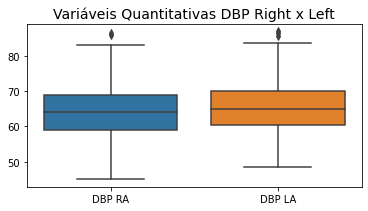

In [20]:
ax = sns.boxplot(data = data[["DBP RA", "DBP LA"]], orient = 'v')
ax.figure.set_size_inches(6, 3)
ax.set_title('Variáveis Quantitativas DBP Right x Left', fontsize=14)
ax

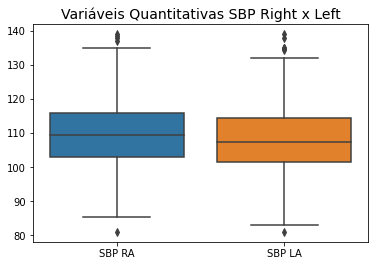

In [21]:
ax = sns.boxplot(data = data[["SBP RA", "SBP LA"]], orient = 'v')
ax.figure.set_size_inches(6, 4)
ax.set_title('Variáveis Quantitativas SBP Right x Left', fontsize=14)
ax

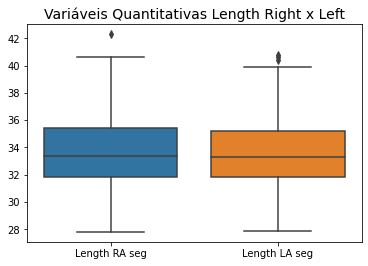

In [22]:
ax = sns.boxplot(data = data[["Length RA seg", "Length LA seg"]], orient = 'v')
ax.figure.set_size_inches(6, 4)
ax.set_title('Variáveis Quantitativas Length Right x Left', fontsize=14)
ax

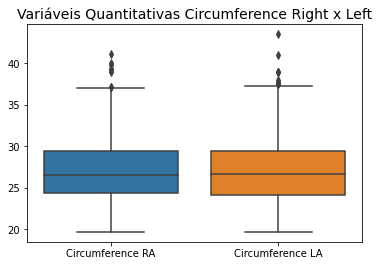

In [23]:
ax = sns.boxplot(data = data[["Circumference RA", "Circumference LA"]], orient = 'v')
ax.figure.set_size_inches(6, 4)
ax.set_title('Variáveis Quantitativas Circumference Right x Left', fontsize=14)
ax

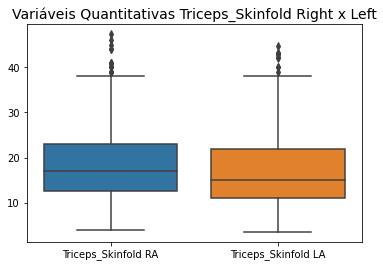

In [24]:
ax = sns.boxplot(data = data[["Triceps_Skinfold RA", "Triceps_Skinfold LA"]], orient = 'v')
ax.figure.set_size_inches(6, 4)
ax.set_title('Variáveis Quantitativas Triceps_Skinfold Right x Left', fontsize=14)
ax

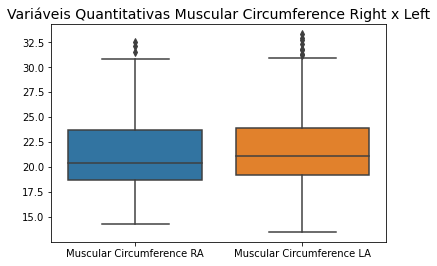

In [25]:
ax = sns.boxplot(data = data[["Muscular Circumference RA", "Muscular Circumference LA"]], orient = 'v')
ax.figure.set_size_inches(6, 4)
ax.set_title('Variáveis Quantitativas Muscular Circumference Right x Left', fontsize=14)
ax

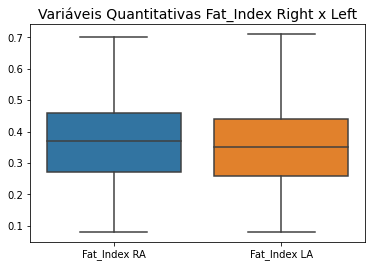

In [26]:
ax = sns.boxplot(data = data[["Fat_Index RA", "Fat_Index LA"]], orient = 'v')
ax.figure.set_size_inches(6, 4)
ax.set_title('Variáveis Quantitativas Fat_Index Right x Left', fontsize=14)
ax

In [27]:
data_melt = (
    data_dobrados.drop(['id', 'Sex', 'SBP_ob', 'Circumference', 'Length', 'Triceps_Skinfold', 'Muscular Circumference', 'Fat_Index'], axis=1).
    melt(id_vars='arm')
)
data_melt['variable'] = pd.Categorical(data_melt['variable'], 
                                        categories = ['SBP', 'DBP'])

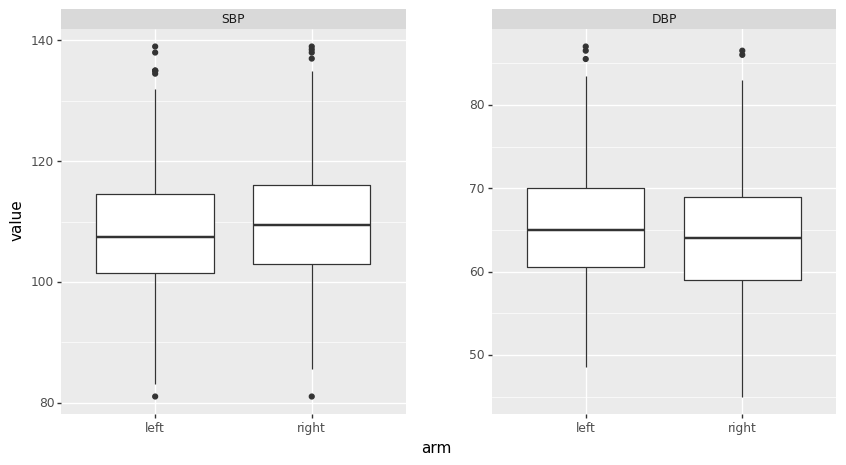

<ggplot: (8763461887581)>

In [28]:
(
    ggplot(data_melt,
           aes(x='arm', y='value')) + 
    geom_boxplot() + 
    facet_wrap(" ~ variable", scales='free') + 
    theme(figure_size=(10, 5), subplots_adjust={'wspace': 0.25}) + 
    theme()
)

In [29]:
data_melt = data_dobrados[['DBP', 'SBP', 'arm']].melt(id_vars='arm')
(
    ggplot(data_melt, aes(x='value', fill='arm')) + 
    geom_density(alpha=0.5) + 
    #geom_histogram() + 
    facet_grid(". ~ variable")
)
data_melt['variable'] = pd.Categorical(data_melt['variable'], 
                                        categories = ['SBP', 'DBP'])


In [30]:
data_melt = (
    data_dobrados.drop(['id', 'Sex', 'SBP_ob'], axis=1).
    melt(id_vars='arm')
)
data_melt['variable'] = pd.Categorical(data_melt['variable'], 
                                        categories = ['Circumference', 'Length', 'Triceps_Skinfold', 'Fat_Index'])



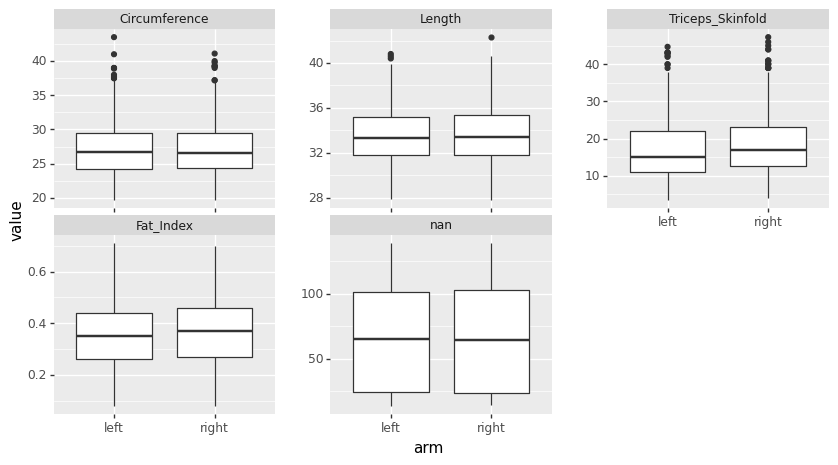

<ggplot: (8763452783093)>

In [31]:
(
    ggplot(data_melt,
           aes(x='arm', y='value')) + 
    geom_boxplot() + 
    facet_wrap(" ~ variable", scales='free') + 
    theme(figure_size=(10, 5), subplots_adjust={'wspace': 0.25}) + 
    theme()
)

In [32]:
data_melt = (
    data_dobrados.drop(['id', 'Sex', 'SBP_ob', 'Muscular Circumference'], axis=1).
    melt(id_vars='arm')
)
data_melt['variable'] = pd.Categorical(data_melt['variable'], 
                                        categories = [ 'SBP', 'DBP','Circumference', 'Length', 'Triceps_Skinfold', 'Fat_Index'])



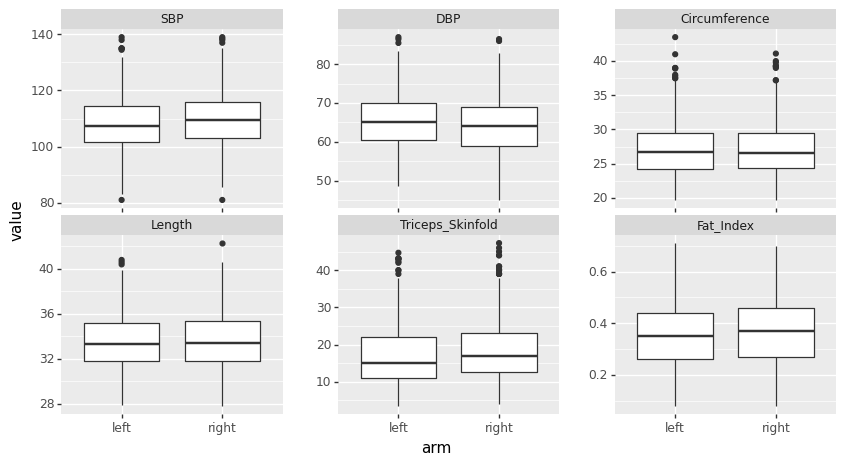

<ggplot: (8763452644853)>

In [33]:
(
    ggplot(data_melt,
           aes(x='arm', y='value')) + 
    geom_boxplot() + 
    facet_wrap(" ~ variable", scales='free') + 
    theme(figure_size=(10, 5), subplots_adjust={'wspace': 0.25}) + 
    theme()
)

## <font color=green>Normal Teste</font>
***

### **Normal Test Function**

In [34]:
from scipy.stats import probplot
from scipy.stats import shapiro

In [35]:
def teste_normal(data):
  for i in data.columns:
    stat_test, p_valor = normaltest(data[[i]])
    if(p_valor <= 0.05):
      print(f" {i} - Distribuição NÃO normal") # Rejeita H0
    else:
      print(f" ************* {i} - Distribuição normal")      
#t is based on D’Agostino and Pearson’s [1], [2] test that combines skew and kurtosis to produce an omnibus test of normality.
#1 D’Agostino, R. B. (1971), “An omnibus test of normality for moderate and large sample size”, Biometrika, 58, 341-348
#2 D’Agostino, R. and Pearson, E. S. (1973), “Tests for departure from normality”, Biometrika, 60, 613-622

In [36]:
def teste_normal_shapiro(data):
    for i in data.columns:
        w_test, p_valor = shapiro(data[[i]])
        if(p_valor <= 0.05):
            print(f" {i} - Distribuição NÃO normal com p-valor: {round(p_valor, 4)}") # Rejeita H0
        else:
            print(f" ************* {i} - Distribuição normal com p-valor: {round(p_valor, 4)}")
            

### **Teste de normal arm Right**

In [37]:
teste_normal_shapiro(data_bd.drop(columns=['id','Sex']))

 Length - Distribuição NÃO normal com p-valor: 0.0003
 Circumference - Distribuição NÃO normal com p-valor: 0.0
 Triceps_Skinfold - Distribuição NÃO normal com p-valor: 0.0
 Muscular Circumference - Distribuição NÃO normal com p-valor: 0.0
 Fat_Index - Distribuição NÃO normal com p-valor: 0.0088
 ************* DBP - Distribuição normal com p-valor: 0.3234
 SBP - Distribuição NÃO normal com p-valor: 0.0156


Com base no teste de Shapiro-Wilk não há evidências de que variável SBP, na sua escala original, seja normal, dado o baixo p-valor. Apesar disso, o seu comportamento é bastante semelhante a uma normal, dado que é simétrica e sem valores muito extremos.  
Por outro lado, aplicando uma transformação logarítmica, muito comum em variáveis contínuas e sempre positivas, SBPsamos a não rejeitar a hipotese nula de normal para a variável SBP. 

In [38]:
def teste_normal_shapiro_log(data):
    for i in data.columns:
        w_test, p_valor = shapiro(np.log(data[[i]]))
        if(p_valor <= 0.05):
            print(f" {i} - Distribuição NÃO normal com p-valor: {round(p_valor, 4)}") # Rejeita H0
        else:
            print(f" ************* {i} - Distribuição normal com p-valor: {round(p_valor, 4)}")
            

In [39]:
teste_normal_shapiro_log(data_bd.drop(columns=['id','Sex']))

 Length - Distribuição NÃO normal com p-valor: 0.0083
 Circumference - Distribuição NÃO normal com p-valor: 0.0
 Triceps_Skinfold - Distribuição NÃO normal com p-valor: 0.0005
 Muscular Circumference - Distribuição NÃO normal com p-valor: 0.0
 Fat_Index - Distribuição NÃO normal com p-valor: 0.0
 ************* DBP - Distribuição normal com p-valor: 0.0747
 ************* SBP - Distribuição normal com p-valor: 0.6437


$$Y = \beta_{0} + \beta_{1}x_i$$

$$Y_{ijk} = \beta_{0} + \beta_{1}x_i + \delta_i + \delta_k$$

$$\log Y = \beta_0 + \beta_1 x_i$$

$$Y = e^{\beta_0 + \beta_1 x_i}$$

$$Y = (\beta_{0} + \beta_{1})^2$$

$$Y_i \sim N(\beta_{0}, \beta_{1}x_i, \sigma^2)$$

X = 4

$z_1$ = 1, se o indivíduo percenter ao grupo 1, 0 caso contrário  
$z_2$ = 1, se o indi                         2, 0 caso contrário  
$z_3$ = 1, se o indi                         3, 0 caso contrário   

Se $z_1 = z_2 = z_3 = 0$, então o indi  é do 4








### **Teste de normal arm Left**

In [40]:
teste_normal_shapiro(data_be.drop(columns=['id','Sex']))

 Length - Distribuição NÃO normal com p-valor: 0.0008
 Circumference - Distribuição NÃO normal com p-valor: 0.0
 Triceps_Skinfold - Distribuição NÃO normal com p-valor: 0.0
 Muscular Circumference - Distribuição NÃO normal com p-valor: 0.0
 Fat_Index - Distribuição NÃO normal com p-valor: 0.0022
 ************* DBP - Distribuição normal com p-valor: 0.0511
 SBP - Distribuição NÃO normal com p-valor: 0.0006


In [41]:
teste_normal_shapiro_log(data_be.drop(columns=['id','Sex']))

 Length - Distribuição NÃO normal com p-valor: 0.0178
 Circumference - Distribuição NÃO normal com p-valor: 0.0
 Triceps_Skinfold - Distribuição NÃO normal com p-valor: 0.0003
 Muscular Circumference - Distribuição NÃO normal com p-valor: 0.0
 Fat_Index - Distribuição NÃO normal com p-valor: 0.0
 ************* DBP - Distribuição normal com p-valor: 0.4939
 ************* SBP - Distribuição normal com p-valor: 0.1863


As pressões diastólicas foram normalmente distribuídas, mas as pressões sistólicas não. Porém, ao vermos os boxplots e os gráficos de quantis normais, podemos ver que as SBP não se afastam muito da normal; assim, podemos considerar todas com distribuição normal (assim, teremos os mesmos testes e usaremos os testes para distribuição normal – que têm maior poder estatístico)

## <font color=green>Average Test Body Side</font>
***

Utilizaremos um teste não paramétrio para commpação das médias dos parametros dos hemicorpos. Mann-Whitney é um teste não paramétrico utilizado para verificar se duas amostras independentes foram selecionadas a partir de populações que têm a mesma média. 

### <font color='red'>Critério do valor $p$</font>

> ### Rejeitar $H_0$ se o valor $p\leq\alpha$ 

In [42]:
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind, ttest_rel
from scipy.stats import wilcoxon
significancia = 0.05

In [43]:
def compara_medias_normal(data1, data2):
    p_list = list()
    p_compara = list()
    for i in data1.columns:
        u, p_valor = ttest_ind(data1[[i]], data2[[i]])
        if p_valor[0] <= significancia:
            p_compara.append("Médias diferentes")
        else:
            p_compara.append("Médias iguais")
        p_list.append(p_valor[0])
    return p_list, p_compara

In [44]:
def compara_medias(data1, data2):
    p_list = list()
    p_compara = list()
    for i in data1.columns:
        u, p_valor = mannwhitneyu(data1[[i]], data2[[i]])
        if p_valor[0] <= significancia:
            p_compara.append("Médias diferentes")
        else:
            p_compara.append("Médias iguais")
        p_list.append(p_valor[0])
    return p_list, p_compara

In [45]:
def compara_medias_wilcoxon(data1, data2):
    p_list = list()
    p_compara = list()
    for i in data1.columns:
        u, p_valor = wilcoxon(data1[i], data2[i])
        if p_valor <= significancia:
            p_compara.append("Médias diferentes")
        else:
            p_compara.append("Médias iguais")
        p_list.append(p_valor)
    return p_list, p_compara

In [46]:
def compara_medias_par_ttest(data1, data2):
    p_list = list()
    p_compara = list()
    for i in data1.columns:
        u, p_valor = ttest_rel(data1[i], data2[i])
        if p_valor <= significancia:
            p_compara.append("Médias diferentes")
        else:
            p_compara.append("Médias iguais")
        p_list.append(p_valor)
    return p_list, p_compara

**Comparação de médias como distribuição não normal**

In [47]:
medias_hemicorpo_bd = data_bd.drop(columns=['id','Sex']).mean()
medias_hemicorpo_bd = pd.DataFrame(data=medias_hemicorpo_bd, columns=["Right"])
medias_hemicorpo_be = data_be.drop(columns=['id','Sex']).mean()
medias_hemicorpo_be = pd.DataFrame(data=medias_hemicorpo_be, columns=["Left"])
medias_hemicorpos = pd.concat([medias_hemicorpo_bd,medias_hemicorpo_be], axis=1)
medias_hemicorpos.round(2)


,Right,Left
Length,33.68,33.55
Circumference,27.22,27.18
Triceps_Skinfold,18.50,17.18
Muscular Circumference,21.41,21.79
Fat_Index,0.37,0.35
DBP,64.01,65.42
SBP,109.91,108.60


In [48]:
p_list, p_compara = compara_medias(data_bd.drop(columns=['id','Sex']), data_be.drop(columns=['id','Sex']))
medias_hemicorpos["p_value"] = p_list
medias_hemicorpos["p_compare"] = p_compara
medias_hemicorpos.round(3)

,Right,Left,p_value,p_compare
Length,33.685,33.553,0.470,Médias iguais
Circumference,27.221,27.181,0.852,Médias iguais
Triceps_Skinfold,18.504,17.179,0.006,Médias diferentes
Muscular Circumference,21.408,21.786,0.059,Médias iguais
Fat_Index,0.372,0.348,0.004,Médias diferentes
DBP,64.010,65.417,0.004,Médias diferentes
SBP,109.911,108.598,0.033,Médias diferentes


**Comparação de médias como distribuição normal**

In [49]:
p_list, p_compara = compara_medias_normal(data_bd.drop(columns=['id','Sex']), data_be.drop(columns=['id','Sex']))
medias_hemicorpos["p_value"] = p_list
medias_hemicorpos["p_compare"] = p_compara
medias_hemicorpos.round(3)

,Right,Left,p_value,p_compare
Length,33.685,33.553,0.438,Médias iguais
Circumference,27.221,27.181,0.869,Médias iguais
Triceps_Skinfold,18.504,17.179,0.014,Médias diferentes
Muscular Circumference,21.408,21.786,0.095,Médias iguais
Fat_Index,0.372,0.348,0.004,Médias diferentes
DBP,64.010,65.417,0.002,Médias diferentes
SBP,109.911,108.598,0.040,Médias diferentes


In [50]:
p_list, p_compara = compara_medias_wilcoxon(data_bd.drop(columns=['id','Sex']), data_be.drop(columns=['id','Sex']))
medias_hemicorpos["p_value"] = p_list
medias_hemicorpos["p_compare"] = p_compara
medias_hemicorpos.round(3)

,Right,Left,p_value,p_compare
Length,33.685,33.553,0.000,Médias diferentes
Circumference,27.221,27.181,0.078,Médias iguais
Triceps_Skinfold,18.504,17.179,0.000,Médias diferentes
Muscular Circumference,21.408,21.786,0.000,Médias diferentes
Fat_Index,0.372,0.348,0.000,Médias diferentes
DBP,64.010,65.417,0.000,Médias diferentes
SBP,109.911,108.598,0.000,Médias diferentes


In [51]:
p_list, p_compara = compara_medias_par_ttest(data_bd.drop(columns=['id','Sex']), data_be.drop(columns=['id','Sex']))
medias_hemicorpos["p_value"] = p_list
medias_hemicorpos["p_compare"] = p_compara
medias_hemicorpos.round(3)

,Right,Left,p_value,p_compare
Length,33.685,33.553,0.00,Médias diferentes
Circumference,27.221,27.181,0.17,Médias iguais
Triceps_Skinfold,18.504,17.179,0.00,Médias diferentes
Muscular Circumference,21.408,21.786,0.00,Médias diferentes
Fat_Index,0.372,0.348,0.00,Médias diferentes
DBP,64.010,65.417,0.00,Médias diferentes
SBP,109.911,108.598,0.00,Médias diferentes


A partir destes resultados, assumindo a igualdade do Length e da Circumference dos arms e a diferença entre os valores da PA, da dobra cutânea e do Fat_Index do arm, optou-se por utilizar o n de 978 (soma do n de ambos os arms – 489). Isto justifica-se pelas medidas que estatisticamente, mostram que os arms Right e Left são simétricos em Length e Circumference, mas assimétricos nos valores da prega cutânea de Triceps_Skinfold e do Fat_Index do arm e, com diferentes em valores pressóricos.

# <font color='red' style='font-size: 30px;'>ANÁLISES DESCRITIVAS DOS data DOBRADOS</font>
<hr style='border: 2px solid red;'>

In [52]:
data_dobrados.shape

(978, 11)

## <font color=green>Distribuição de frequências para variáveis quantitativas e teste de nomalAge</font>
***

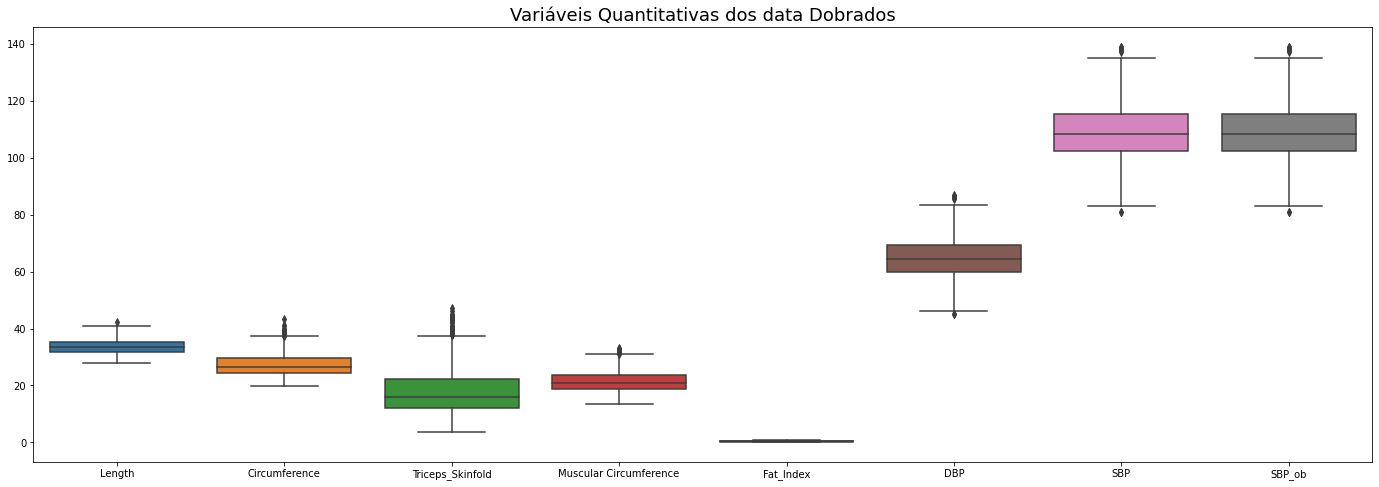

In [53]:
ax = sns.boxplot(data = data_dobrados.drop(columns=['id','Sex']), orient = 'v')
ax.figure.set_size_inches(24, 8)
ax.set_title('Variáveis Quantitativas dos data Dobrados', fontsize=18)
ax

### **Teste de normal**

In [54]:
teste_normal_shapiro(data_dobrados.drop(columns=['id','Sex', 'arm', 'SBP_ob']))

 Length - Distribuição NÃO normal com p-valor: 0.0
 Circumference - Distribuição NÃO normal com p-valor: 0.0
 Triceps_Skinfold - Distribuição NÃO normal com p-valor: 0.0
 Muscular Circumference - Distribuição NÃO normal com p-valor: 0.0
 Fat_Index - Distribuição NÃO normal com p-valor: 0.0
 DBP - Distribuição NÃO normal com p-valor: 0.0493
 SBP - Distribuição NÃO normal com p-valor: 0.0


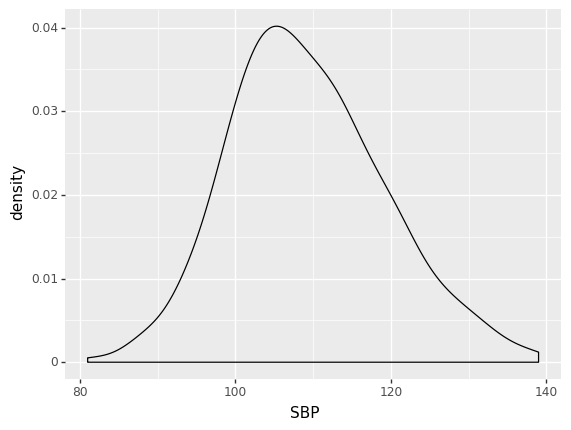

<ggplot: (8763461820521)>

In [55]:
(
    ggplot(data_dobrados, aes(x='SBP')) + 
    geom_density()
)

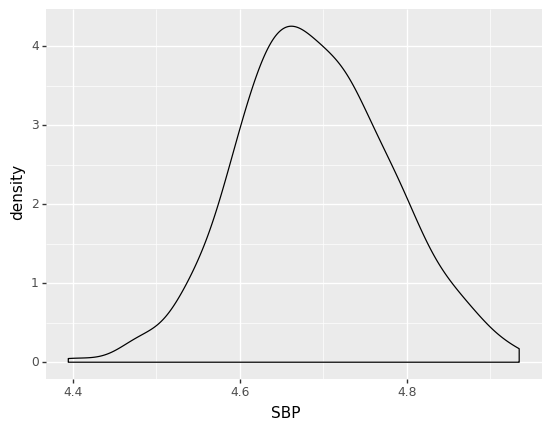

<ggplot: (8763452403317)>

In [56]:
(
    ggplot(data_dobrados.assign(SBP = np.log(data_dobrados.SBP)), aes(x='SBP')) + 
    geom_density()
)

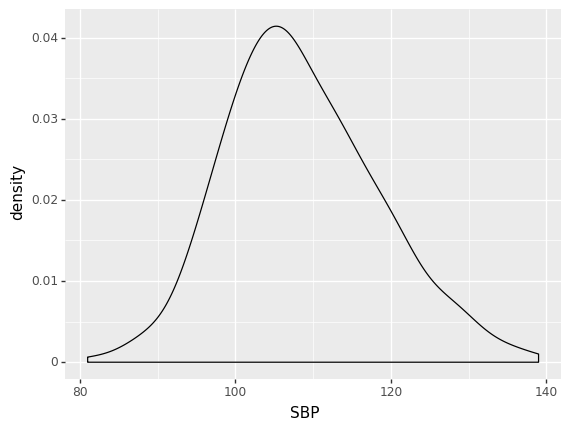

<ggplot: (8763452403221)>

In [57]:
(
    ggplot(data_be, aes(x='SBP')) + 
    geom_density()
)

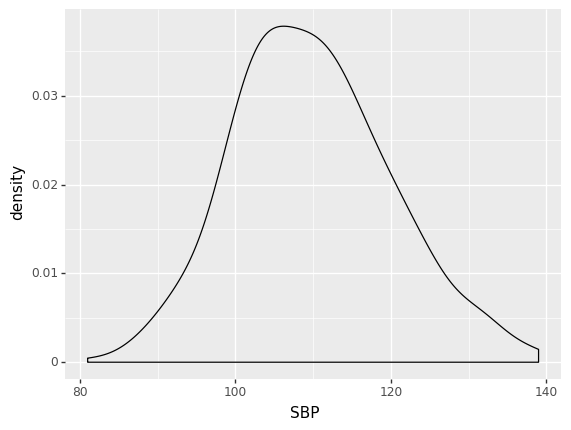

<ggplot: (8763452496177)>

In [58]:
(
    ggplot(data_bd, aes(x='SBP')) + 
    geom_density()
)

In [59]:
teste_normal_shapiro_log(data_dobrados.drop(columns=['id','Sex', 'arm', 'SBP_ob']))

 Length - Distribuição NÃO normal com p-valor: 0.0001
 Circumference - Distribuição NÃO normal com p-valor: 0.0
 Triceps_Skinfold - Distribuição NÃO normal com p-valor: 0.0
 Muscular Circumference - Distribuição NÃO normal com p-valor: 0.0
 Fat_Index - Distribuição NÃO normal com p-valor: 0.0
 DBP - Distribuição NÃO normal com p-valor: 0.0466
 ************* SBP - Distribuição normal com p-valor: 0.058


Marginalmente normal, marginalmente significativo

## <font color=green>Distribuição de frequências para variáveis qualitativas</font>
***

### Distribuição dos participantes por Circumference de arm

Não existe uma resposta ideal para a divisão de uma variável quantitative em classes/intervalos.A Regra de Sturges que otimiza a escolha da quantAge de classes que teremos nas tabelas de distribuições, considerando somente o número de observações que temos na variável. Porém aplicar a regra de Sturges a conjuntos de data com mais de 200 pontos pode novamente levar a suavização excessiva. A regra de Sturge funciona melhor para data contínuos que são normalmente distribuídos e simétricos.A fórmula de Doane é uma modificação da fórmula de Sturges que tenta melhorar seu desempenho com data não normais.


#### Regra de Doane


# $$n_h = 1 + \log_{2}(n) +  \log_{2}(1 + \frac{|g_1|}{\sigma_{g_1}})$$

## $$ g_1 = mean[(\frac{x - \mu}{\sigma})^3] $$

## $$ \sigma_{g_1} = \sqrt{\frac{6(n - 2)}{(n + 1)(n + 3)}} $$

#### SBPso 1 - Difinindo o número de classes

In [60]:
bins_doane = np.histogram_bin_edges(data_dobrados['Circumference'], bins='doane')
bins_doane 

array([19.7       , 21.28666667, 22.87333333, 24.46      , 26.04666667,
       27.63333333, 29.22      , 30.80666667, 32.39333333, 33.98      ,
       35.56666667, 37.15333333, 38.74      , 40.32666667, 41.91333333,
       43.5       ])

$\beta = 3$

Quando eu avançar x unAges na Circumference, em média, a SBP irá aumentar $x\cdot 10$. 

Não iria rejeitar que $\beta = 0$.


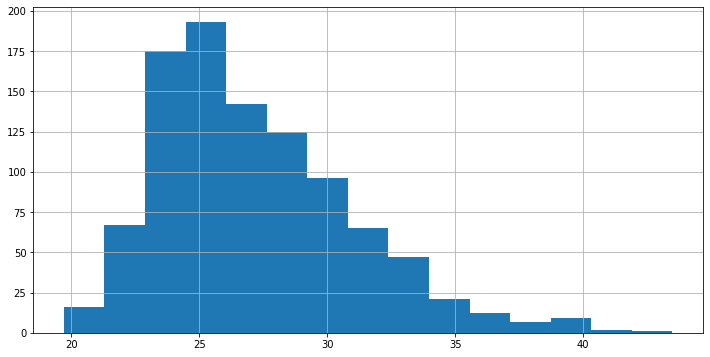

In [61]:
data_dobrados['Circumference'].hist(bins = bins_doane , figsize=(12, 6)) #histrogram direto sem tabela

#### SBPso 2 - Tabela de Frequências

In [62]:
labels = [i for i in range(1,16)]
frequencia_circunferencia = pd.value_counts( 
    pd.cut(
    x = data_dobrados['Circumference'],
    bins = bins_doane.round(2),
    include_lowest = True
),
    sort = False,
)

percentual_circunferencia = pd.value_counts(
  pd.cut(
    x = data_dobrados['Circumference'],
    bins = bins_doane.round(2),
    include_lowest = True
  ),
  sort = False,
  normalize = True
)

dist_freq_circunferencia = pd.DataFrame(
    {'Labels': labels, 'Frequência': frequencia_circunferencia, 'Porcentagem (%)': percentual_circunferencia * 100}
)
dist_freq_circunferencia.round(2)

,Labels,Frequência,Porcentagem (%)
"(19.698999999999998, 21.29]",1,16,1.64
"(21.29, 22.87]",2,67,6.85
"(22.87, 24.46]",3,175,17.89
"(24.46, 26.05]",4,193,19.73
"(26.05, 27.63]",5,142,14.52
"(27.63, 29.22]",6,125,12.78
"(29.22, 30.81]",7,96,9.82
"(30.81, 32.39]",8,65,6.65
"(32.39, 33.98]",9,47,4.81
"(33.98, 35.57]",10,21,2.15


In [63]:
data_dobrados_intervalos = data_dobrados.copy()
data_dobrados_intervalos["intervalo_circunferencia"] = pd.cut(x = data_dobrados.Circumference,
         bins = bins_doane.round(2) ,
         include_lowest = True,
         right = False
         )
data_dobrados_intervalos["label_circunferencia"] = pd.cut(x = data_dobrados.Circumference,
         bins = bins_doane ,
         labels = labels,
         include_lowest = True,
         right = False
         )

data_dobrados_intervalos

,id,Sex,Length,Circumference,Triceps_Skinfold,Muscular Circumference,Fat_Index,DBP,SBP,arm,SBP_ob,intervalo_circunferencia,label_circunferencia
1,1,m,38.00,31.5,14.7,26.9,0.27,62.0,106.5,right,112.5,"[30.81, 32.39)",8
2,1,m,36.50,30.8,17.7,25.3,0.33,60.5,112.5,left,106.5,"[29.22, 30.81)",7
3,2,f,28.83,25.3,22.3,18.3,0.48,56.5,100.0,right,102.0,"[24.46, 26.05)",4
4,2,f,30.43,25.0,22.3,18.0,0.48,56.5,102.0,left,100.0,"[24.46, 26.05)",4
5,4,f,34.13,22.4,24.0,14.9,0.56,58.5,98.5,right,95.0,"[21.29, 22.87)",2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
974,590,f,33.50,23.0,14.0,18.6,0.35,59.0,102.5,right,103.5,"[22.87, 24.46)",3
975,592,m,34.80,29.1,16.8,23.8,0.33,63.5,112.5,left,110.0,"[27.63, 29.22)",6
976,592,m,34.90,29.9,20.0,23.6,0.38,59.0,110.0,right,112.5,"[29.22, 30.81)",7
977,1000,f,39.40,29.0,15.9,24.0,0.31,78.5,131.5,right,128.0,"[27.63, 29.22)",6


### **Comparação de médias ṕor intervalo Circumference**

In [64]:
medias_circunferencia = data_dobrados_intervalos.drop(columns=['id','SBP_ob']).groupby("intervalo_circunferencia").mean().round(2).T
medias_circunferencia.T


,Length,Circumference,Triceps_Skinfold,Muscular Circumference,Fat_Index,DBP,SBP
intervalo_circunferencia,,,,,,,
"[19.7, 21.29)",32.58,20.70,10.34,17.44,0.29,65.53,106.44
"[21.29, 22.87)",32.23,22.15,13.02,18.06,0.33,65.54,105.07
"[22.87, 24.46)",33.65,23.65,14.54,19.08,0.35,63.40,105.33
"[24.46, 26.05)",32.97,25.28,16.18,20.20,0.36,63.81,106.25
"[26.05, 27.63)",32.88,26.93,19.59,20.78,0.40,64.50,107.98
"[27.63, 29.22)",33.76,28.50,18.14,22.81,0.35,64.08,112.17
"[29.22, 30.81)",34.96,30.05,18.86,24.13,0.35,65.56,113.55
"[30.81, 32.39)",34.61,31.51,19.74,25.31,0.35,63.79,114.12
"[32.39, 33.98)",34.59,32.95,21.68,26.14,0.36,68.05,114.81


# <font color='red' style='font-size: 30px;'> CORRELATION</font>
<hr style='border: 2px solid red;'>

The Pearson method is used by default, but the Pandas allows the use of other indexes. Pearson’s correlation measures the linear association between continuous variables. It is the value that indicates how much the relationship between variables can be described by a line. Interpreting the value of ρ


    0.9 to 1 positive or negative indicates a very strong correlation.
    0.7 to 0.9 positive or negative indicates a strong correlation.
    0.5 to 0.7 positive or negative indicates a moderate correlation.
    0.3 to 0.5 positive or negative indicates a weak correlation.
    0 to 0.3 positive or negative indicates a negligible correlation.

### <font color=blue>Correlação para 978 data</font>

**Person**

Perhaps the most common correlation measure is Pearson’s correlation that assumes a Gaussian distribution to each variable and reports on their linear relationship.

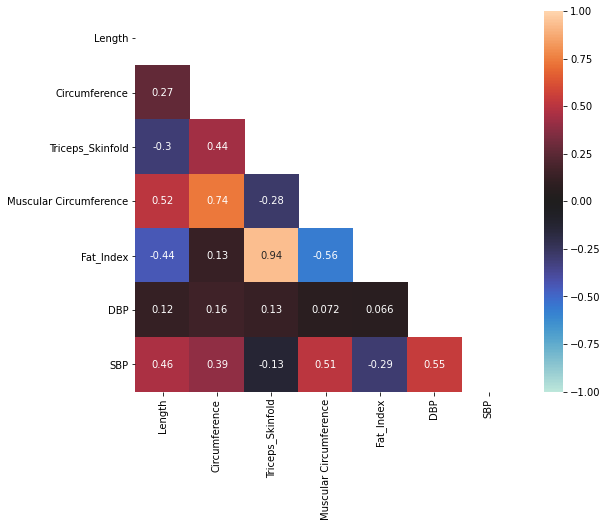

In [65]:
corr = data_dobrados.drop(columns=['id','Sex', 'arm', 'SBP_ob']).corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
_, ax = plt.subplots(figsize=(10, 7))
ax = sns.heatmap(corr, annot= True, vmin = -1, vmax = 1, square = True, mask=mask, center=0 )

**SpearMan**

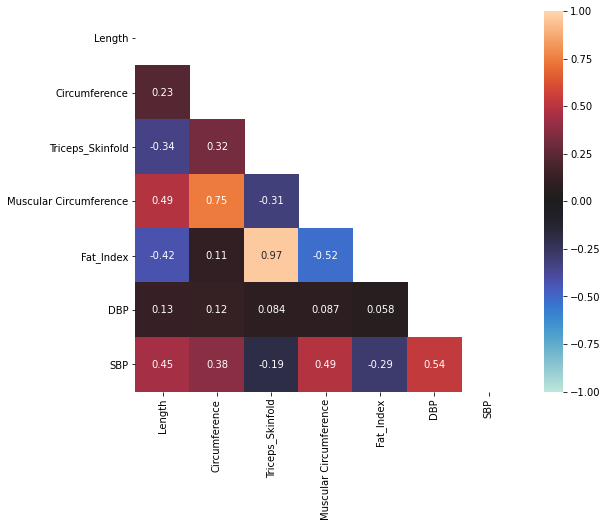

In [66]:
corr = data_dobrados.drop(columns=['id','Sex', 'arm', 'SBP_ob']).corr(method="spearman")
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
_, ax = plt.subplots(figsize=(10, 7))
ax = sns.heatmap(corr, annot= True, vmin = -1, vmax = 1, square = True, mask=mask, center=0 )

### <font color=blue>Correlação para as Circumferences</font>

In [67]:
labels = [i for i in range(1,16)]
frequencia_circunferencia = pd.value_counts( 
    pd.cut(
    x = data_dobrados_intervalos['Circumference'],
    bins = bins_doane,
    include_lowest = True
),
    sort = False,
)

percentual_circunferencia = pd.value_counts(
  pd.cut(
    x = data_dobrados_intervalos['Circumference'],
    bins = bins_doane,
    include_lowest = True
  ),
  sort = False,
  normalize = True
)

dist_freq_circunferencia = pd.DataFrame(
    {'Labels': labels, 'Frequência': frequencia_circunferencia, 'Porcentagem (%)': percentual_circunferencia * 100}
)
dist_freq_circunferencia.sort_values(by=['Frequência'], ascending=False,).round(2)

,Labels,Frequência,Porcentagem (%)
"(24.46, 26.047]",4,193,19.73
"(22.873, 24.46]",3,175,17.89
"(26.047, 27.633]",5,142,14.52
"(27.633, 29.22]",6,125,12.78
"(29.22, 30.807]",7,96,9.82
"(21.287, 22.873]",2,67,6.85
"(30.807, 32.393]",8,65,6.65
"(32.393, 33.98]",9,47,4.81
"(33.98, 35.567]",10,21,2.15
"(19.698999999999998, 21.287]",1,16,1.64


#### **Intervalo de Circumference 4  (24.46, 26.047]**

**Person**

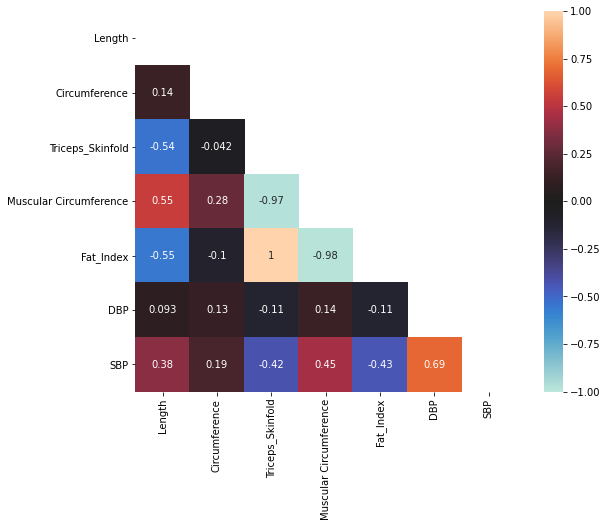

In [68]:
corr = data_dobrados_intervalos.drop(columns=['id','Sex', 'arm', 'SBP_ob']).query("label_circunferencia == 4").corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
_, ax = plt.subplots(figsize=(10, 7))
ax = sns.heatmap(corr, annot= True, vmin = -1, vmax = 1, square = True, mask=mask, center=0 )

**SpearMan**

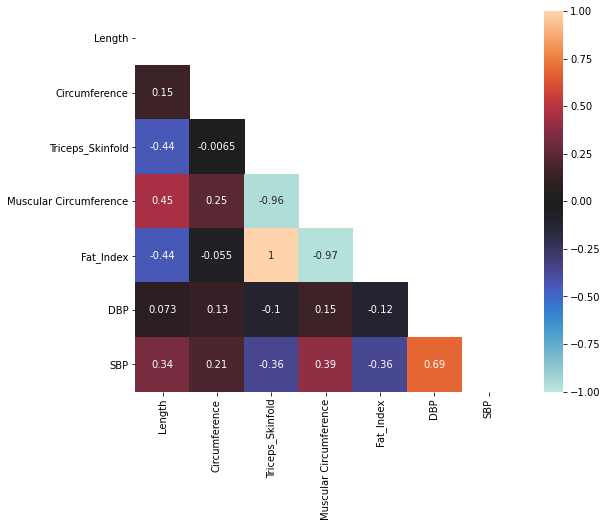

In [69]:
corr = data_dobrados_intervalos.drop(columns=['id','Sex', 'arm', 'SBP_ob']).query("label_circunferencia == 4").corr(method="spearman")
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
_, ax = plt.subplots(figsize=(10, 7))
ax = sns.heatmap(corr, annot= True, vmin = -1, vmax = 1, square = True, mask=mask, center=0 )

#### **Intervalo de Circumference 3 (22.873, 24.46]**

**Person**

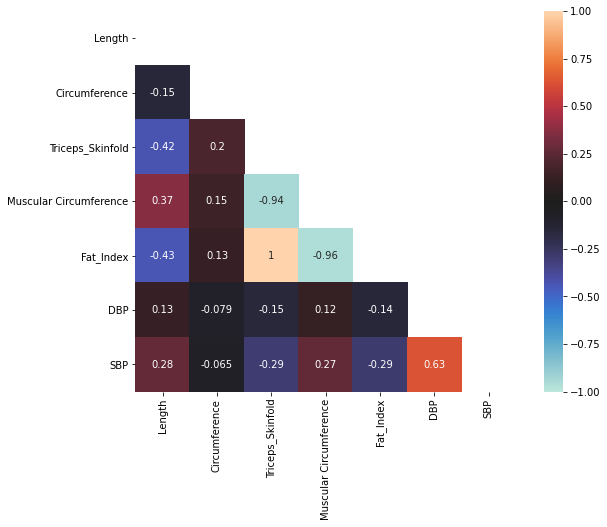

In [70]:
corr = data_dobrados_intervalos.drop(columns=['id','Sex', 'arm', 'SBP_ob']).query("label_circunferencia == 3").corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
_, ax = plt.subplots(figsize=(10, 7))
ax = sns.heatmap(corr, annot= True, vmin = -1, vmax = 1, square = True, mask=mask, center=0 )

**SpearMan**

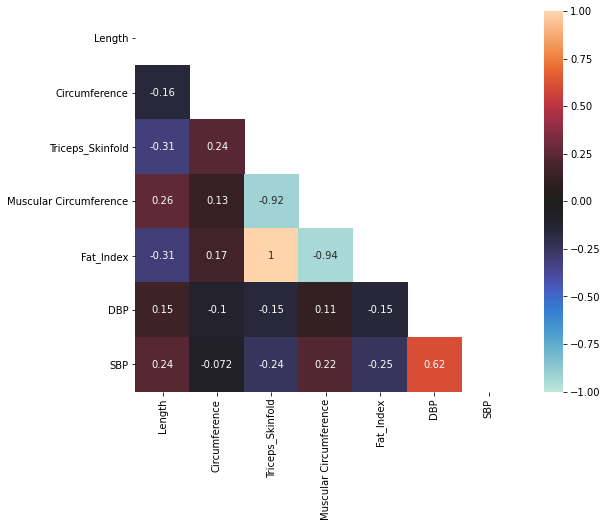

In [71]:
corr = data_dobrados_intervalos.drop(columns=['id','Sex','arm', 'SBP_ob']).query("label_circunferencia == 3").corr(method="spearman")
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
_, ax = plt.subplots(figsize=(10, 7))
ax = sns.heatmap(corr, annot= True, vmin = -1, vmax = 1, square = True, mask=mask, center=0 )


#### **Intervalo de Circumference 5 (26.047, 27.633]**

**Person**

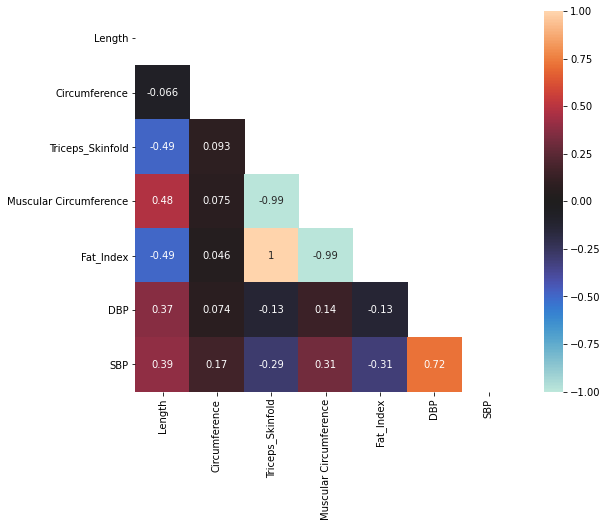

In [72]:
corr = data_dobrados_intervalos.drop(columns=['id','Sex','arm', 'SBP_ob']).query("label_circunferencia == 5").corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
_, ax = plt.subplots(figsize=(10, 7))
ax = sns.heatmap(corr, annot= True, vmin = -1, vmax = 1, square = True, mask=mask, center=0 )

**SpearMan**

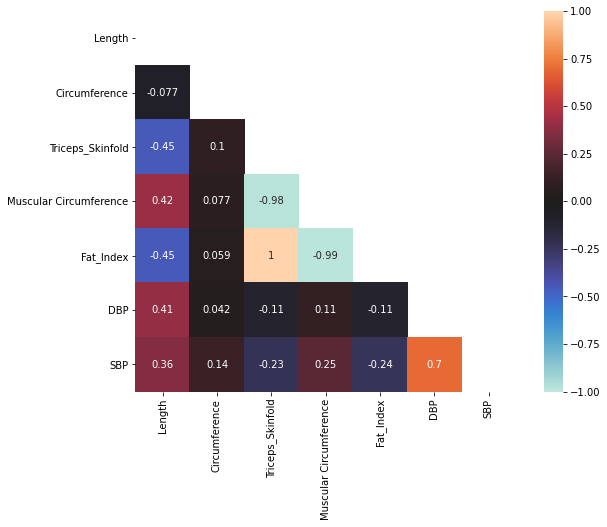

In [73]:
corr = data_dobrados_intervalos.drop(columns=['id','Sex','arm', 'SBP_ob']).query("label_circunferencia == 5").corr(method="spearman")
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
_, ax = plt.subplots(figsize=(10, 7))
ax = sns.heatmap(corr, annot= True, vmin = -1, vmax = 1, square = True, mask=mask, center=0 )


#### **Intervalo de Circumference 6 (27.633, 29.22]**

**Person**

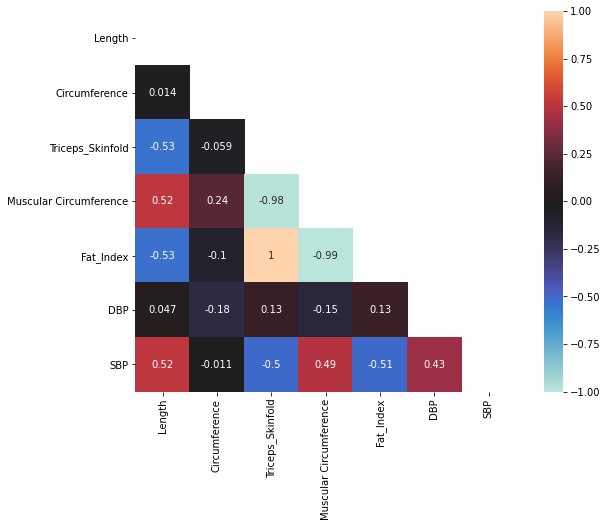

In [74]:
corr = data_dobrados_intervalos.drop(columns=['id','Sex','arm', 'SBP_ob']).query("label_circunferencia == 6").corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
_, ax = plt.subplots(figsize=(10, 7))
ax = sns.heatmap(corr, annot= True, vmin = -1, vmax = 1, square = True, mask=mask, center=0 )

#### **Intervalo de Circumference 7 (29.22, 30.807]**

**Person**

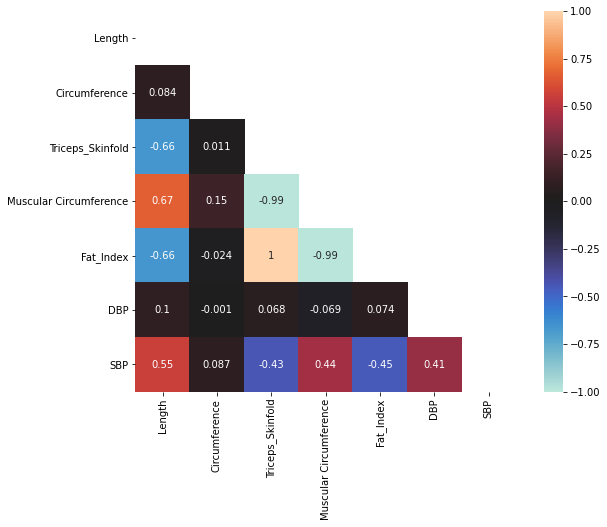

In [75]:
corr = data_dobrados_intervalos.drop(columns=['id','Sex','arm', 'SBP_ob']).query("label_circunferencia == 7").corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
_, ax = plt.subplots(figsize=(10, 7))
ax = sns.heatmap(corr, annot= True, vmin = -1, vmax = 1, square = True, mask=mask, center=0 )

#### **Intervalo de Circumference 2**

**Person**

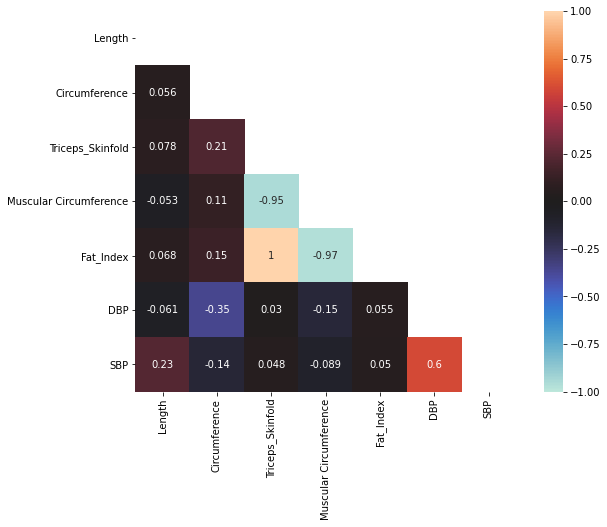

In [76]:
corr = data_dobrados_intervalos.drop(columns=['id','Sex','arm', 'SBP_ob']).query("label_circunferencia == 2").corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
_, ax = plt.subplots(figsize=(10, 7))
ax = sns.heatmap(corr, annot= True, vmin = -1, vmax = 1, square = True, mask=mask, center=0 )

#### **Intervalo de Circumference 8**

**Person**

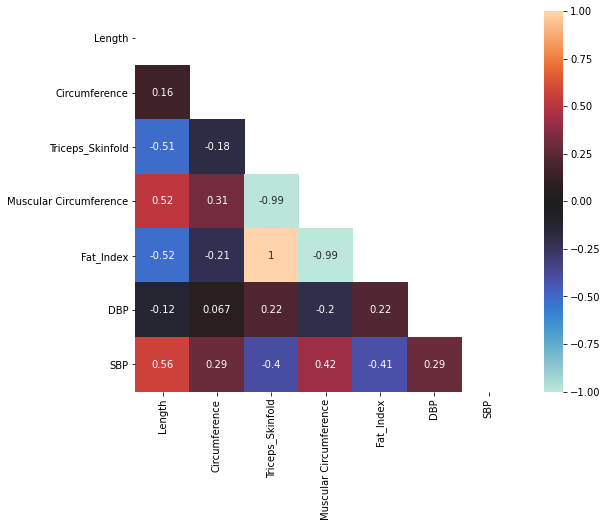

In [77]:
corr = data_dobrados_intervalos.drop(columns=['id','Sex','arm', 'SBP_ob']).query("label_circunferencia == 8").corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
_, ax = plt.subplots(figsize=(10, 7))
ax = sns.heatmap(corr, annot= True, vmin = -1, vmax = 1, square = True, mask=mask, center=0 )

#### **Intervalo de Circumference 9**

**Person**

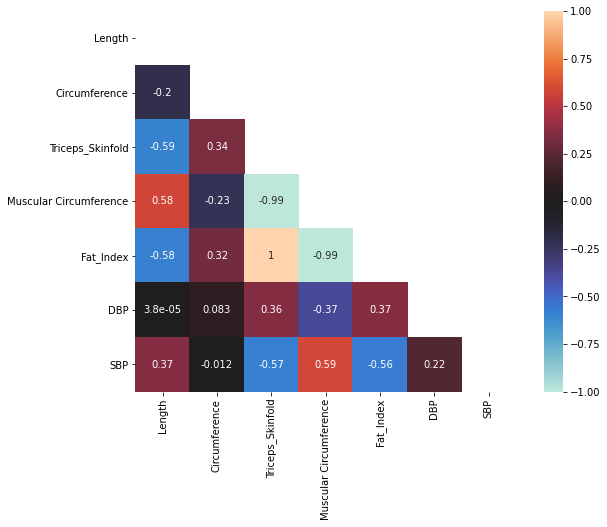

In [78]:
corr = data_dobrados_intervalos.drop(columns=['id','Sex','arm', 'SBP_ob']).query("label_circunferencia == 9").corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
_, ax = plt.subplots(figsize=(10, 7))
ax = sns.heatmap(corr, annot= True, vmin = -1, vmax = 1, square = True, mask=mask, center=0 )

#### **Intervalo de Circumference 10**

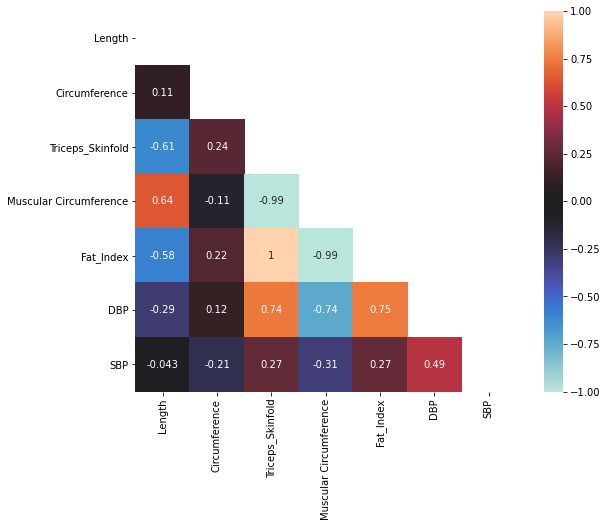

In [79]:
corr = data_dobrados_intervalos.drop(columns=['id','Sex','arm', 'SBP_ob']).query("label_circunferencia == 10").corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
_, ax = plt.subplots(figsize=(10, 7))
ax = sns.heatmap(corr, annot= True, vmin = -1, vmax = 1, square = True, mask=mask, center=0 )

#### **Intervalo de Circumference 1**

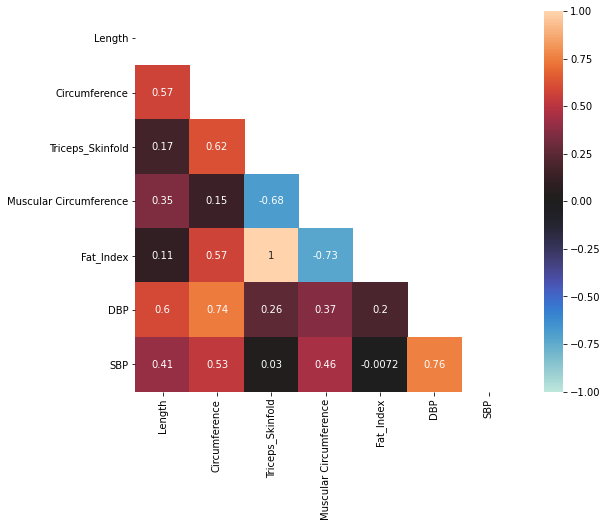

In [80]:
corr = data_dobrados_intervalos.drop(columns=['id','Sex','arm', 'SBP_ob']).query("label_circunferencia == 1").corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
_, ax = plt.subplots(figsize=(10, 7))
ax = sns.heatmap(corr, annot= True, vmin = -1, vmax = 1, square = True, mask=mask, center=0 )

#### **Intervalo de Circumference 11**

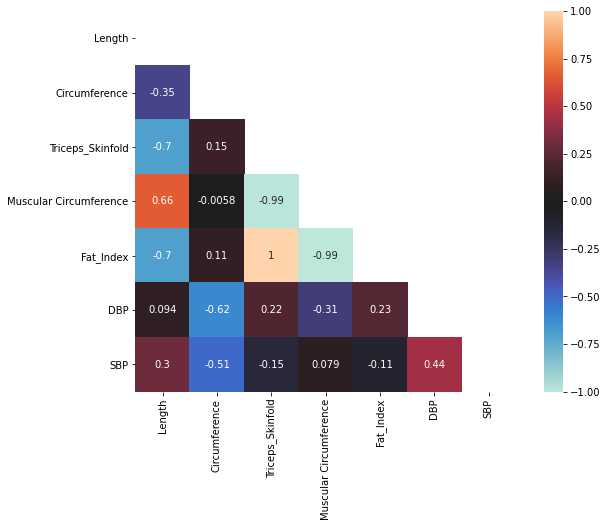

In [81]:
corr = data_dobrados_intervalos.drop(columns=['id','Sex','arm', 'SBP_ob']).query("label_circunferencia == 11").corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
_, ax = plt.subplots(figsize=(10, 7))
ax = sns.heatmap(corr, annot= True, vmin = -1, vmax = 1, square = True, mask=mask, center=0 )

#### **Intervalo de Circumference 13**

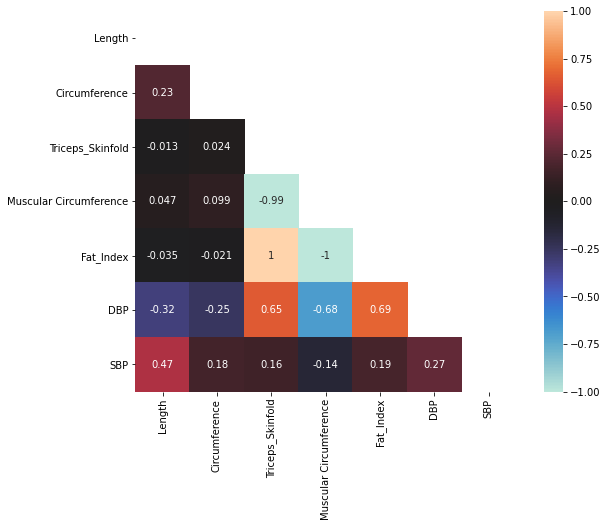

In [82]:
corr = data_dobrados_intervalos.drop(columns=['id','Sex','arm', 'SBP_ob']).query("label_circunferencia == 13").corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
_, ax = plt.subplots(figsize=(10, 7))
ax = sns.heatmap(corr, annot= True, vmin = -1, vmax = 1, square = True, mask=mask, center=0 )

#### **Intervalo de Circumference 12**

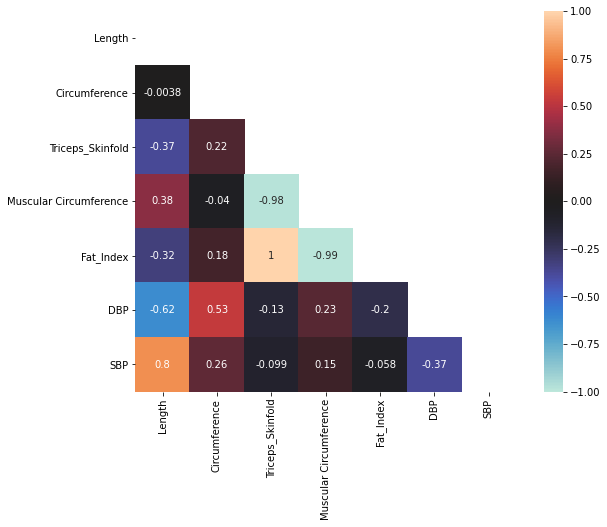

In [83]:
corr = data_dobrados_intervalos.drop(columns=['id','Sex','arm', 'SBP_ob']).query("label_circunferencia == 12").corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
_, ax = plt.subplots(figsize=(10, 7))
ax = sns.heatmap(corr, annot= True, vmin = -1, vmax = 1, square = True, mask=mask, center=0 )

In [84]:
print("SPEARMAN")
for x in range (3,10):
  print(f" \n Intervalo {x} \n")
  print(data_dobrados_intervalos.drop(columns=['id','DBP','Circumference', 'Triceps_Skinfold', 'Muscular Circumference' ,'Sex','arm', 'SBP_ob']).query("label_circunferencia == @x").corr(method="spearman")['SBP'])
  

print("\n PEARSON")
for x in range (3,10):
  print(f" \n Intervalo {x} \n")
  print(data_dobrados_intervalos.drop(columns=['id','DBP','Circumference', 'Triceps_Skinfold', 'Muscular Circumference' ,'Sex','arm', 'SBP_ob']).query("label_circunferencia == @x").corr()['SBP'])
  



SPEARMAN
 
 Intervalo 3 

Length       0.240471
Fat_Index   -0.246937
SBP          1.000000
Name: SBP, dtype: float64
 
 Intervalo 4 

Length       0.335445
Fat_Index   -0.364273
SBP          1.000000
Name: SBP, dtype: float64
 
 Intervalo 5 

Length       0.364104
Fat_Index   -0.237167
SBP          1.000000
Name: SBP, dtype: float64
 
 Intervalo 6 

Length       0.551204
Fat_Index   -0.485274
SBP          1.000000
Name: SBP, dtype: float64
 
 Intervalo 7 

Length       0.581452
Fat_Index   -0.459452
SBP          1.000000
Name: SBP, dtype: float64
 
 Intervalo 8 

Length       0.541338
Fat_Index   -0.421276
SBP          1.000000
Name: SBP, dtype: float64
 
 Intervalo 9 

Length       0.374226
Fat_Index   -0.615694
SBP          1.000000
Name: SBP, dtype: float64

 PEARSON
 
 Intervalo 3 

Length       0.279578
Fat_Index   -0.287992
SBP          1.000000
Name: SBP, dtype: float64
 
 Intervalo 4 

Length       0.379413
Fat_Index   -0.432518
SBP          1.000000
Name: SBP, dtype: float64


## Intervalos menores

In [85]:
for x in range (19,44):
  print(f" \n Intervalo {x} \n")
  print(data_dobrados.drop(columns=['id','DBP','Sex','arm', 'SBP_ob']).query("Circumference >= @x and Circumference <= @x+1  ").corr(method="spearman")['SBP'])
  


 
 Intervalo 19 

Length                    1.0
Circumference             NaN
Triceps_Skinfold         -1.0
Muscular Circumference    1.0
Fat_Index                -1.0
SBP                       1.0
Name: SBP, dtype: float64
 
 Intervalo 20 

Length                    0.080460
Circumference             0.212867
Triceps_Skinfold         -0.247706
Muscular Circumference    0.322584
Fat_Index                -0.222989
SBP                       1.000000
Name: SBP, dtype: float64
 
 Intervalo 21 

Length                    0.471084
Circumference            -0.147735
Triceps_Skinfold          0.046279
Muscular Circumference   -0.106427
Fat_Index                 0.058587
SBP                       1.000000
Name: SBP, dtype: float64
 
 Intervalo 22 

Length                    0.158739
Circumference            -0.056840
Triceps_Skinfold          0.099954
Muscular Circumference   -0.127399
Fat_Index                 0.095269
SBP                       1.000000
Name: SBP, dtype: float64
 
 Intervalo 2

In [86]:
data_dobrados["Circumference"].max()

43.5

In [87]:
data_dobrados["Circumference"].min()

19.7

In [88]:
data_dobrados_intervalos.to_pickle("data_dobrados_intervalos.pkl") ## Exportando tabela